## Task 3 : Exploratory Data Analysis on Dataset - Terrorism

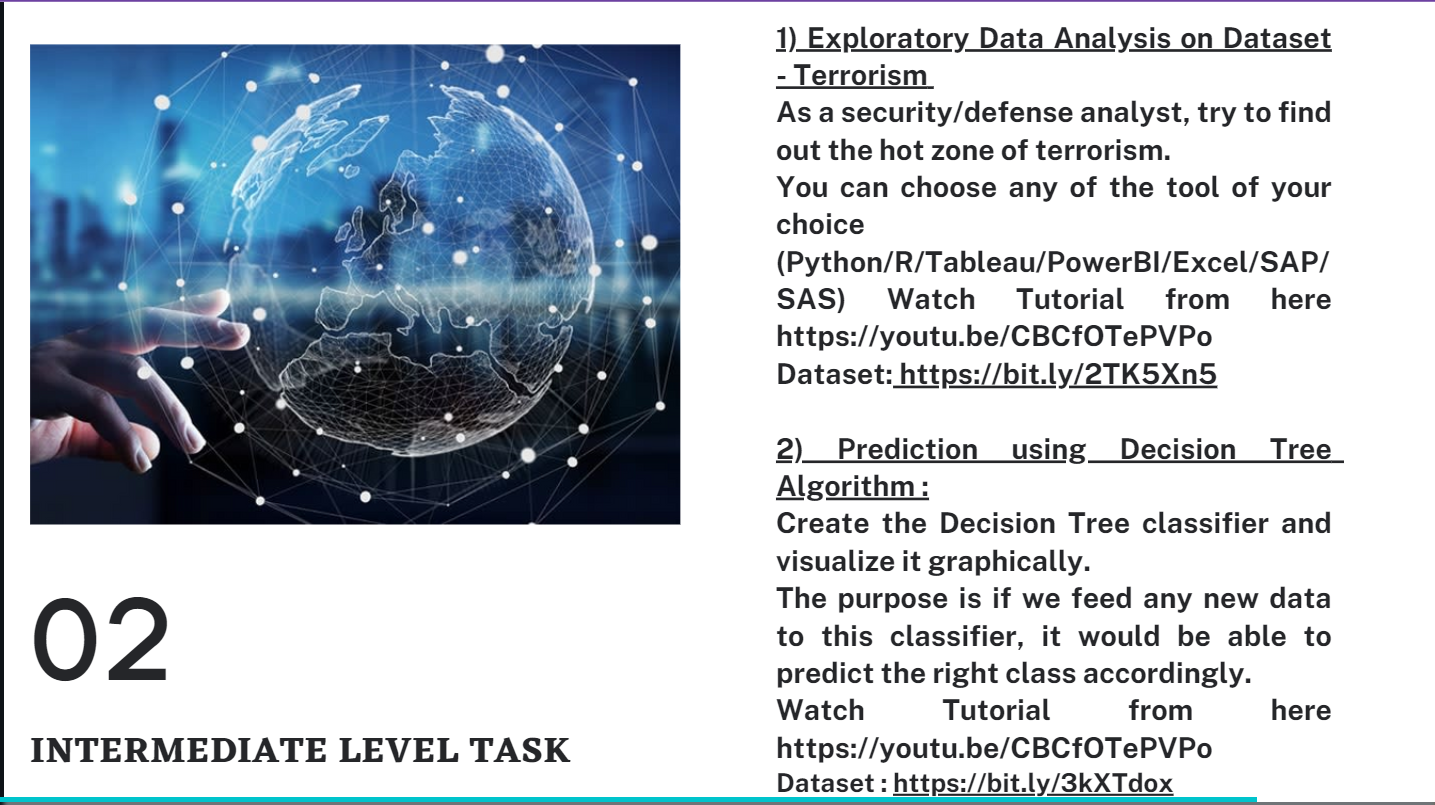

As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice  

(Python/R/Tableau/PowerBI/Excel/SAP/SAS) Watch Tutorial from here https://youtu.be/CBCfOTePVPo

Dataset: https://bit.ly/2TK5Xn5



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head()

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
5,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
7,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [7]:
df.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.shape

(181691, 135)

In [9]:
count_non_miss = df.count().head()
count_non_miss

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
dtype: int64

In [10]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
mean_missing_percent = df.isnull().mean()*100
total_missing = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total_missing, mean_missing_percent],axis =1, keys=['Total', '%'])
missing_data

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,%
INT_ANY,0,0.000000
INT_IDEO,0,0.000000
INT_LOG,0,0.000000
INT_MISC,0,0.000000
addnotes,153402,84.430159
alternative,152680,84.032781
alternative_txt,152680,84.032781
approxdate,172452,94.914993
attacktype1,0,0.000000
attacktype1_txt,0,0.000000


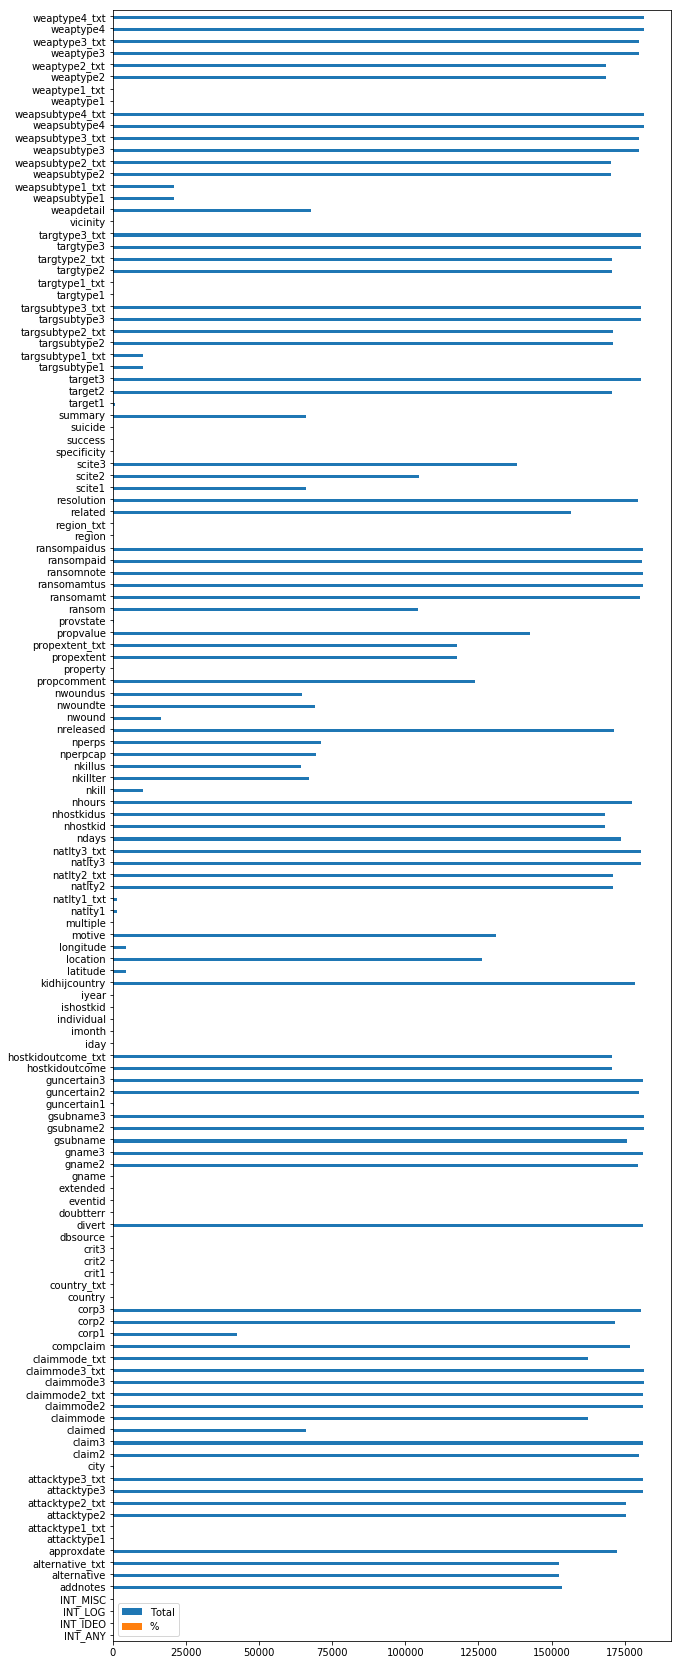

In [12]:
missing_data.plot(kind = "barh",figsize = (10,30))

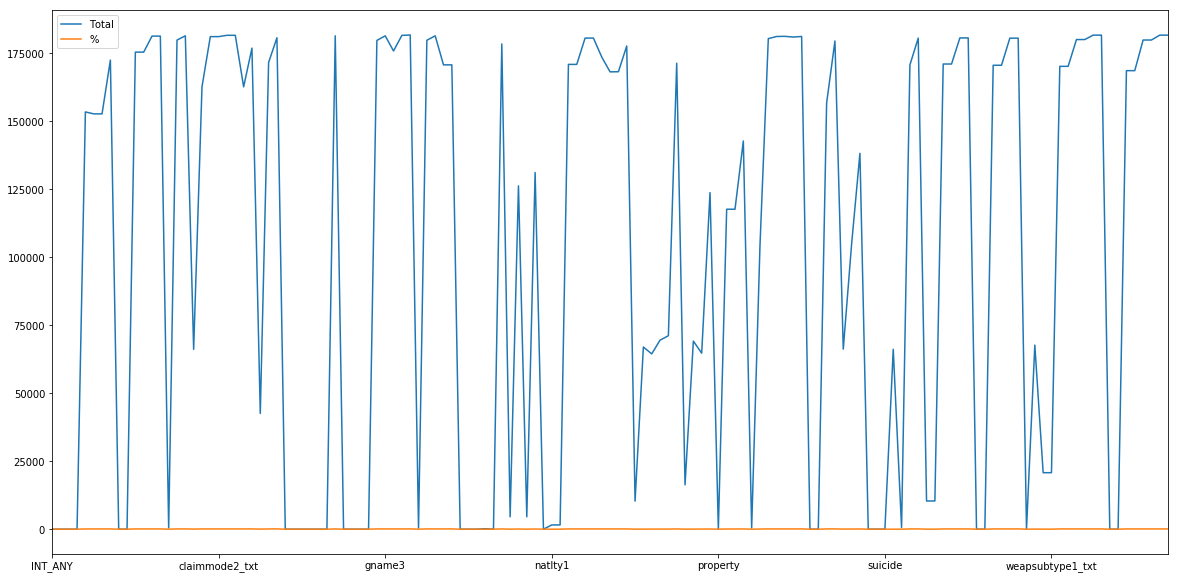

In [13]:
missing_data.plot(figsize=(20,10))

## Extracting Columns

In [14]:
dataset = pd.DataFrame(df,columns = ["eventid","iyear","imonth","iday","country",
                                    "country_txt","region","region_txt","provstate",
                                    "city","location","succes","attacktype1_txt",
                                    "targtype1_txt","targsubtype1_txt"])
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,succes,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [15]:
dataset.shape

(181691, 15)

In [16]:
mean_missing_percent1=dataset.isnull().mean()*100
total_missing1 = dataset.isnull().sum().sort_values(ascending=False)
missing_data1 = pd.concat([total_missing1,mean_missing_percent1],axis =1, keys=['Total', '%'])
missing_data1

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,%
attacktype1_txt,0,0.000000
city,434,0.238867
country,0,0.000000
country_txt,0,0.000000
eventid,0,0.000000
iday,0,0.000000
imonth,0,0.000000
iyear,0,0.000000
location,126196,69.456385
provstate,421,0.231712


## Fill Missing Values

In [17]:
dataset[["provstate"]] = dataset[["provstate"]].fillna(value="0")

In [18]:
dataset[["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"]] = dataset[["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt",
                                  "city","location","succes","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"]] .fillna(value=0)
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,succes,attacktype1_txt,targtype1_txt,targsubtype1_txt,success
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,NaN,Assassination,Private Citizens & Property,Named Civilian,0.0
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,0,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,0,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,0.0
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,0,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,0.0
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,0,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,0.0


In [19]:
dataset.isnull()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,succes,attacktype1_txt,targtype1_txt,targsubtype1_txt,success
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [20]:
dataset.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
country                  0
country_txt              0
region                   0
region_txt               0
provstate                0
city                     0
location                 0
succes              181691
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt         0
success                  0
dtype: int64

## Analayzing Specific Attack Type

In [21]:
assassination = df[df['attacktype1_txt'].str.contains("Assassination",na=False)]
assassination.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
111,197003050003,1970,3,5,NaN,0,NaN,217,United States,1,...,Conflicting reports attribute the incident to ...,Committee on the Judiciary United States Sena...,"William Sater, ""Puerto Rican Terrorists: A Pos...","""Toward People's War for Independence and Soci...",Hewitt Project,0,1,0,1,NaN


In [22]:
assassination.shape

(19312, 135)

## Analyzing Places

In [23]:
assassination.groupby("country_txt").size().sort_values(ascending=False)

country_txt
United Kingdom                    1651
Pakistan                          1406
Colombia                          1343
Iraq                              1287
India                             1229
Philippines                       1099
Peru                              1002
Afghanistan                        954
Spain                              599
Guatemala                          510
Somalia                            484
South Africa                       479
El Salvador                        449
Sri Lanka                          438
Turkey                             437
Yemen                              434
Algeria                            431
Lebanon                            347
West Bank and Gaza Strip           332
Russia                             253
Egypt                              249
Nigeria                            205
Italy                              205
Israel                             202
Libya                              197
Thailand     

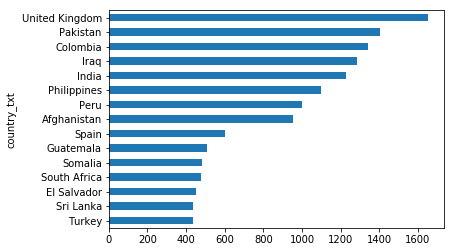

In [24]:
co=sns.color_palette("Spectral", as_cmap=True)
assassination.groupby("country_txt").size().sort_values(ascending=False).head(15).sort_values().plot(kind='barh')

In [25]:
assassination.groupby("region_txt").size().sort_values(ascending=False)

region_txt
South Asia                     4301
Middle East & North Africa     4206
Western Europe                 2938
South America                  2745
Sub-Saharan Africa             1638
Southeast Asia                 1369
Central America & Caribbean    1254
Eastern Europe                  400
North America                   255
Central Asia                    115
East Asia                        55
Australasia & Oceania            36
dtype: int64

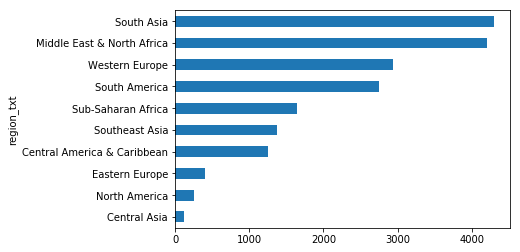

In [26]:
assassination.groupby("region_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

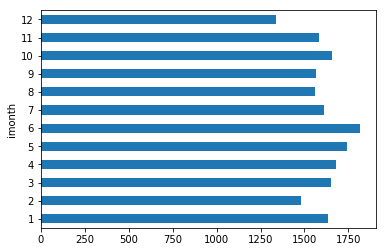

In [27]:
assassination.groupby("imonth").size().plot(kind="barh")

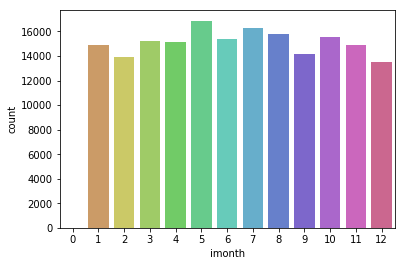

In [28]:
sns.countplot(x=df["imonth"],data=df,palette='hls')

## Destructive Feature of data

In [29]:
print("Country with the most attacks:",df['country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['region'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Group with the most attacks:",df['gname'].value_counts().index[1])
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: 10
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


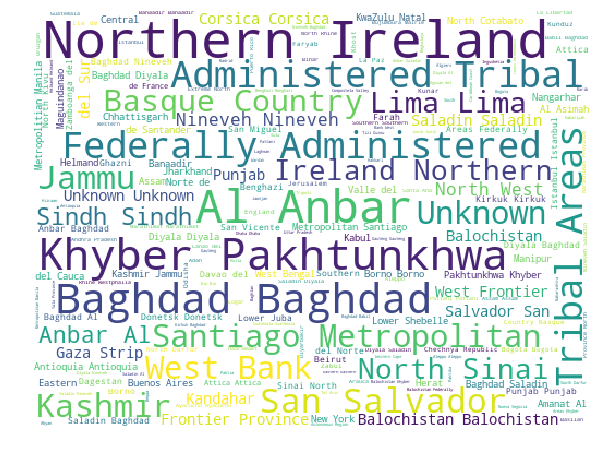

In [30]:
from wordcloud import WordCloud
from scipy import signal
cities = df.provstate.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [31]:
df['iyear'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: iyear, dtype: int64

## DATA VISUALISATION

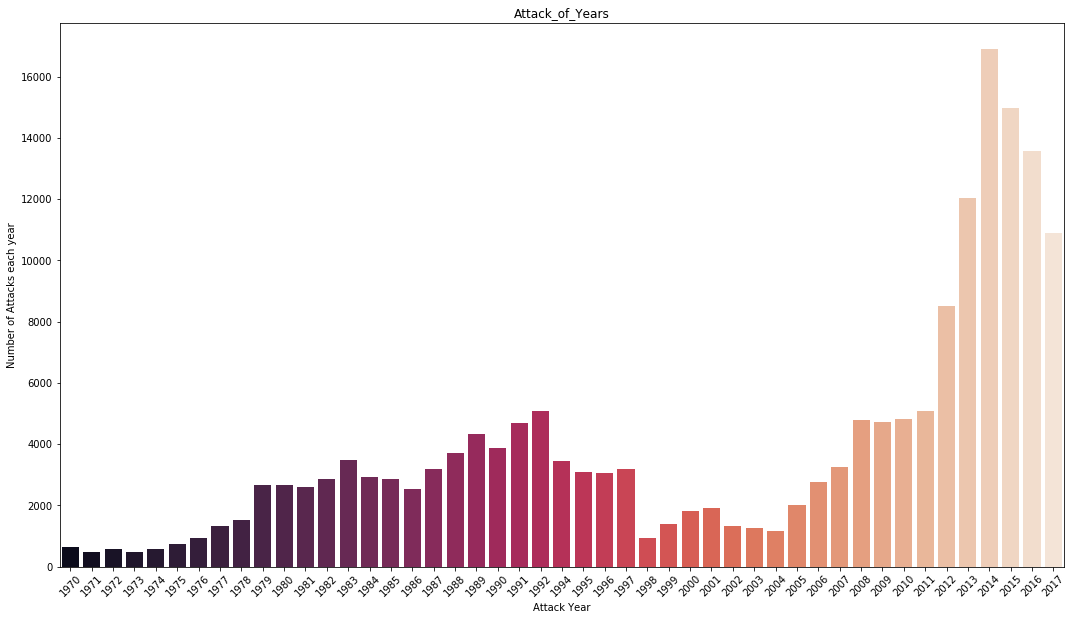

In [32]:
x_year = df['iyear'].unique()
y_count_years = df['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


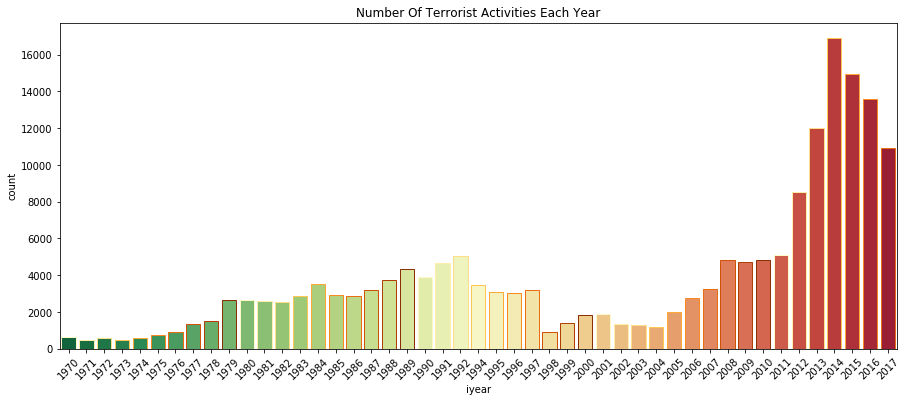

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

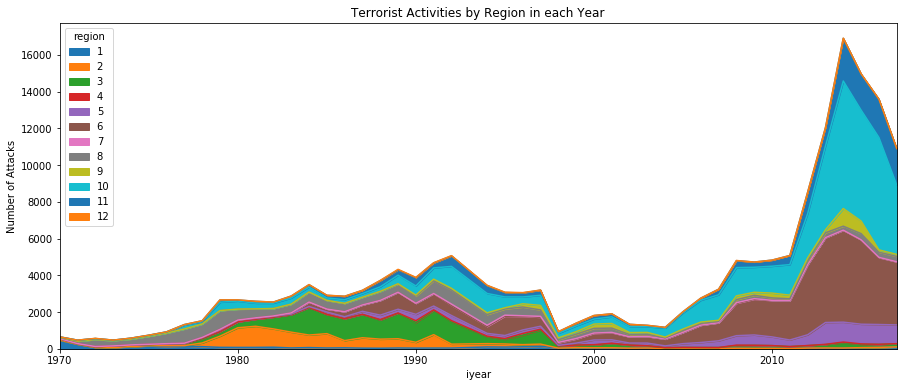

In [34]:
pd.crosstab(df.iyear, df.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [35]:
df['Wounded'] = df['nwound'].fillna(0).astype(int)
df['Killed'] = df['nkill'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [36]:
df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [37]:
heat=df1.pivot_table(index='country',columns='iyear',values='casualities')
heat.fillna(0,inplace=True)

In [38]:
heat.head()

iyear,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [40]:
df.country.value_counts()[:15]

95     24636
153    14368
4      12731
92     11960
45      8306
160     6908
159     6096
61      5320
603     5235
209     4292
182     4142
147     3907
205     3849
228     3347
185     3249
Name: country, dtype: int64

## Top Countries affected by Terror Attacks

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



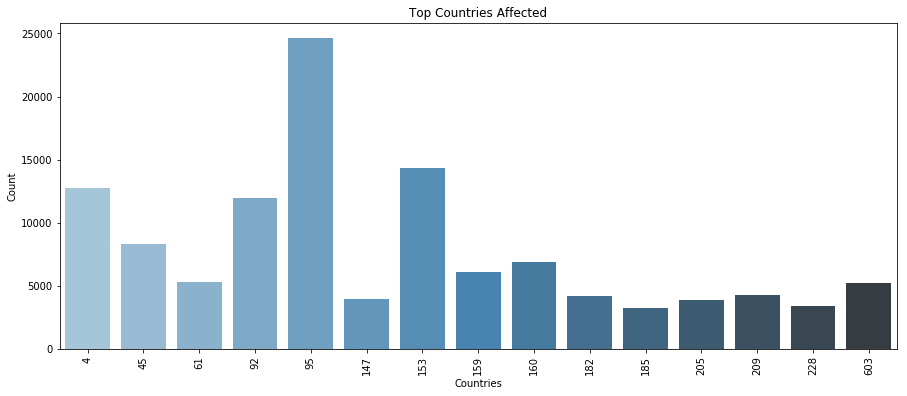

In [41]:
plt.subplots(figsize=(15,6))
sns.barplot(df['country'].value_counts()[:15].index,df['country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## ANALYSIS ON CUSTOMIZED DATA

In [42]:
import folium
from folium.plugins import MarkerCluster 
filterYear = df['iyear'] == 1970

In [43]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [44]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [45]:
df.gname.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: gname, dtype: int64

In [46]:
test = df[df.gname.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [47]:
test.country.unique()

array([159,  26,  45,  11,  30, 130,   4, 153, 200,  95, 209, 208, 110,
       210,  97,  21,  60, 113, 173, 155,  69,  18, 102, 182,  75, 228,
       160, 121,  93, 167,  74, 603,  94,  14], dtype=int64)

In [48]:
terror_df_group = df.dropna(subset=['latitude','longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['country','gname'])
terrorist_groups = df.gname.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.gname.isin(terrorist_groups)]
print(terror_df_group.gname.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [49]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['gname'], 
                  terror_df_group.iloc[i]['country'])).add_to(map)
map

In [50]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [51]:
attackData = df.loc[:,'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,attacktype1_txt,nkill
0,Assassination,1.0
1,Hostage Taking (Kidnapping),0.0
2,Assassination,1.0
3,Bombing/Explosion,NaN
4,Facility/Infrastructure Attack,NaN


In [52]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [53]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
Armed Assault                          1 non-null float64
Assassination                          1 non-null float64
Bombing/Explosion                      1 non-null float64
Facility/Infrastructure Attack         1 non-null float64
Hijacking                              1 non-null float64
Hostage Taking (Barricade Incident)    1 non-null float64
Hostage Taking (Kidnapping)            1 non-null float64
Unarmed Assault                        1 non-null float64
Unknown                                1 non-null float64
dtypes: float64(9)
memory usage: 80.0+ bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257290CDE80>,
      dtype=object)

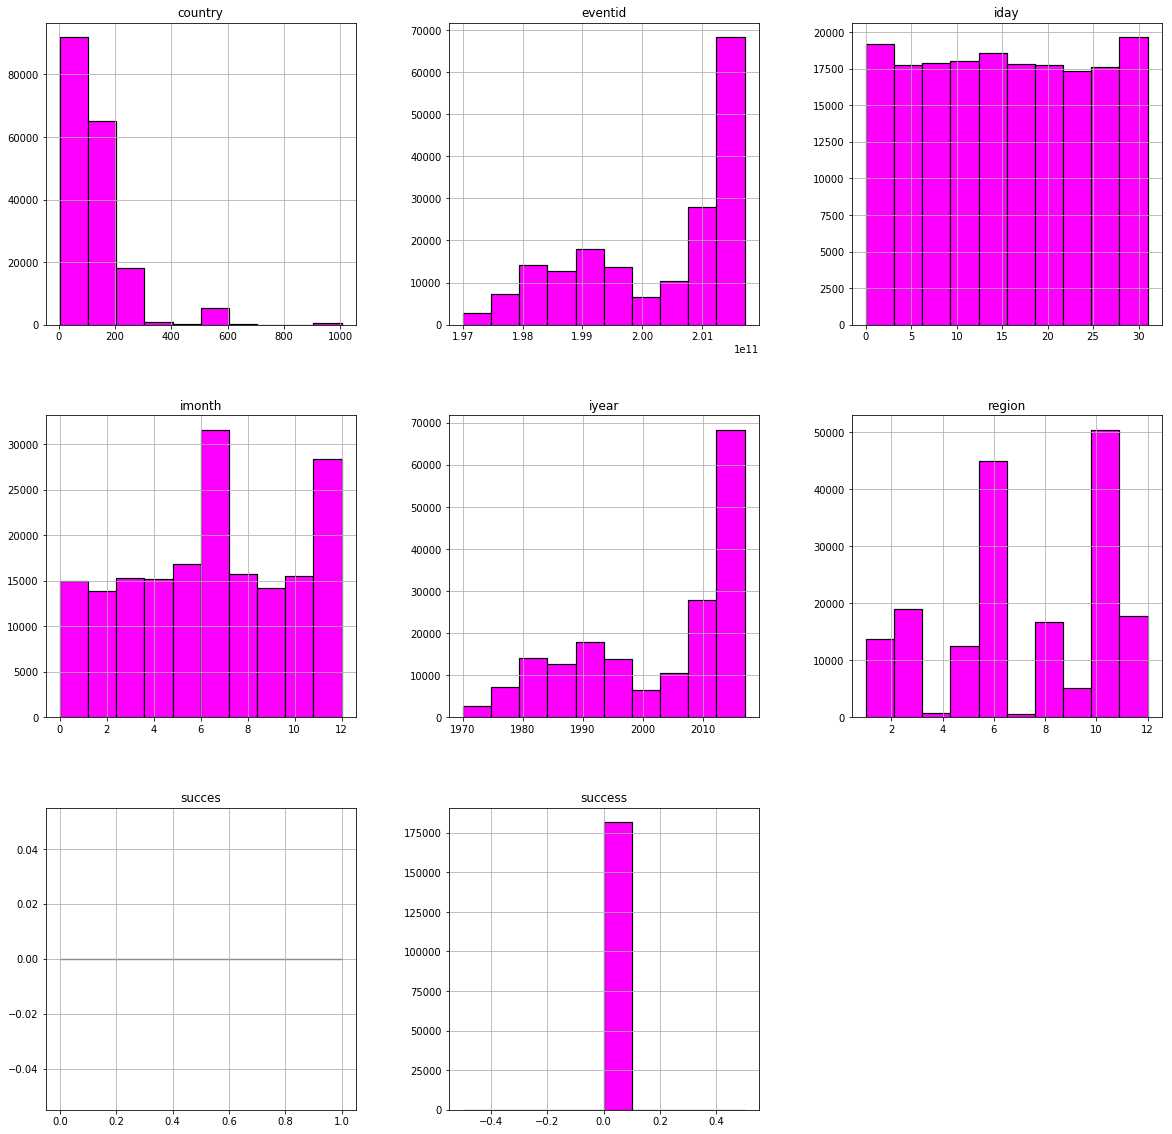

In [54]:
dataset.hist(color='magenta',edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [55]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

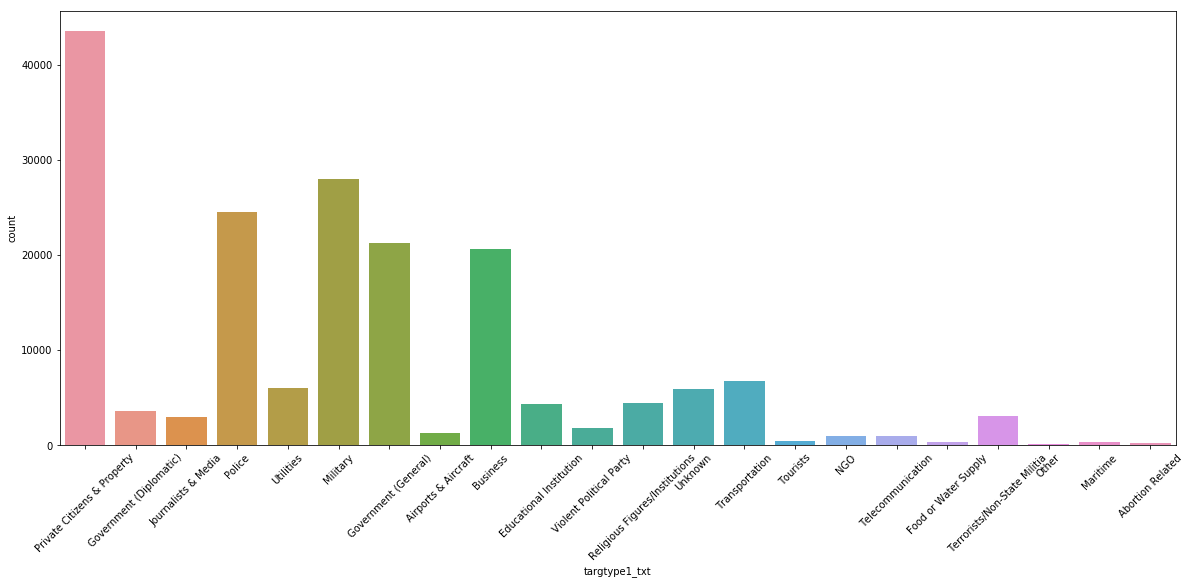

In [56]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(x=df['targtype1_txt'])
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

In [57]:
dataset['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
0                                                          10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Government Building/Facility/Office                         4802
Retail/Grocery/Bakery                                       4274
Electricity                                                 4198
Bank/Commerce                                               3242
House/Apartment/Residence

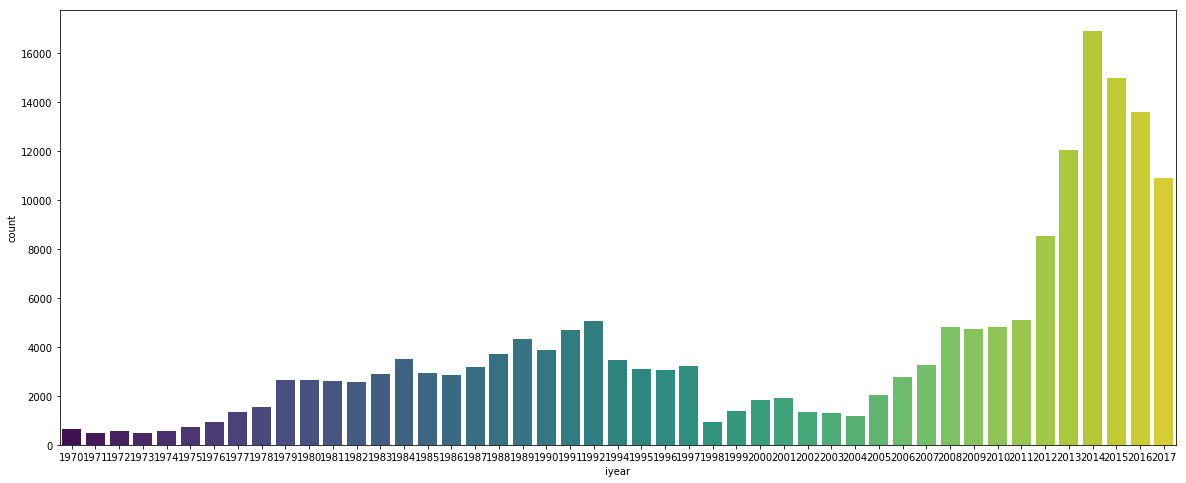

In [58]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['iyear'],palette='viridis')

In [59]:
month = dataset.groupby('targtype1_txt')['iyear'].value_counts(normalize=True)
month

targtype1_txt            iyear
Abortion Related         1984     0.102662
                         1995     0.091255
                         1992     0.068441
                         1994     0.068441
                         1997     0.064639
                         1985     0.053232
                         1986     0.049430
                         1991     0.045627
                         1987     0.041825
                         1996     0.041825
                         1998     0.034221
                         1999     0.034221
                         1989     0.030418
                         1990     0.030418
                         1982     0.026616
                         1988     0.026616
                         1978     0.022814
                         2000     0.022814
                         2015     0.019011
                         1977     0.015209
                         2005     0.015209
                         2012     0.015209
                       

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



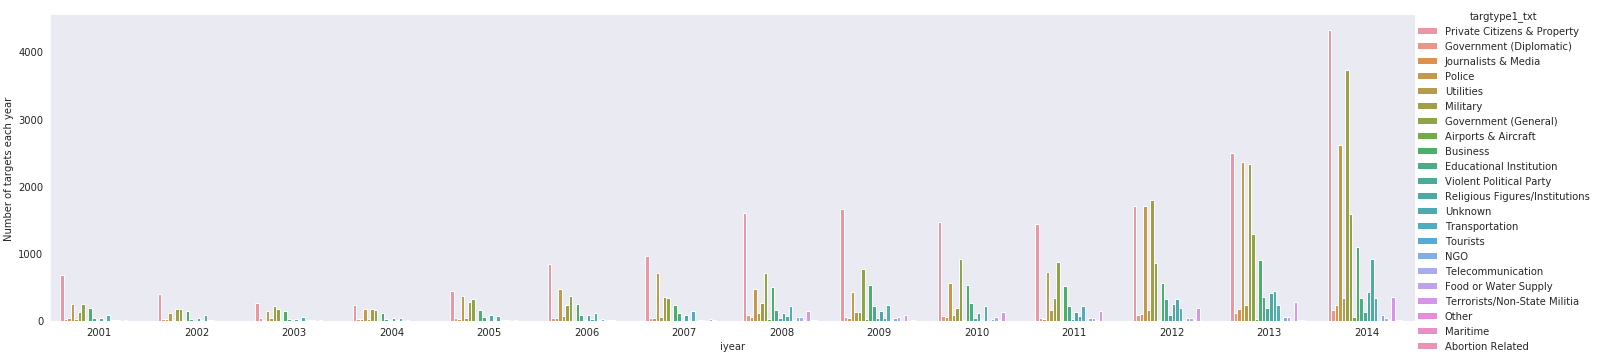

In [60]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=df, aspect=4.0, kind='count',
                       hue='targtype1_txt', order=range(2001, 2015))
    g.set_ylabels('Number of targets each year')

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

c:\users\analy\miniconda3\envs\vobject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



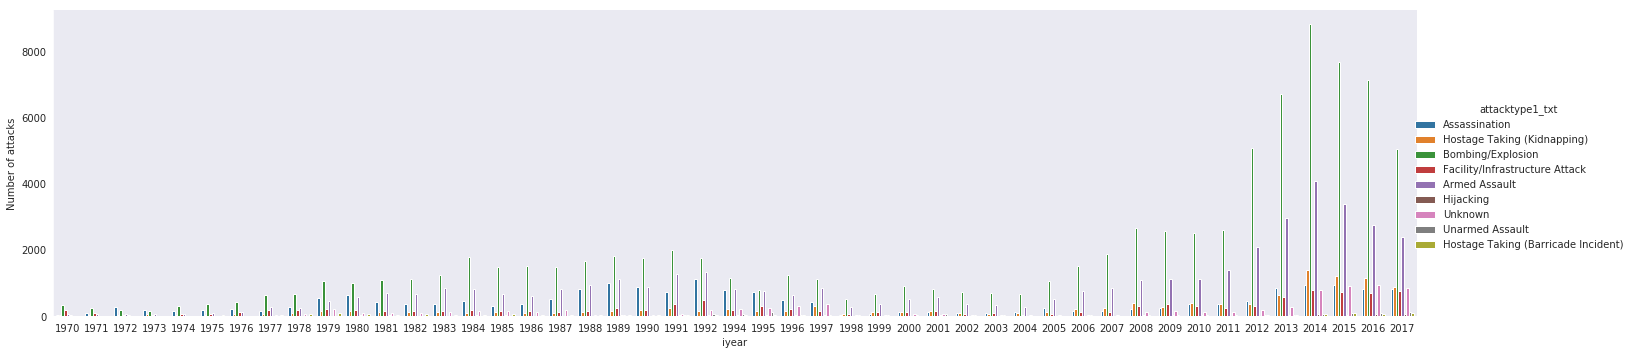

In [61]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=df, aspect=4.0, kind='count',
                       hue='attacktype1_txt')
    g.set_ylabels('Number of attacks')

In [62]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'location', 'succes',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'success'],
      dtype='object')

In [63]:
matrix = dataset[['iyear','region']]
matrix.corr()

,iyear,region
iyear,1.000000,0.401384
region,0.401384,1.000000


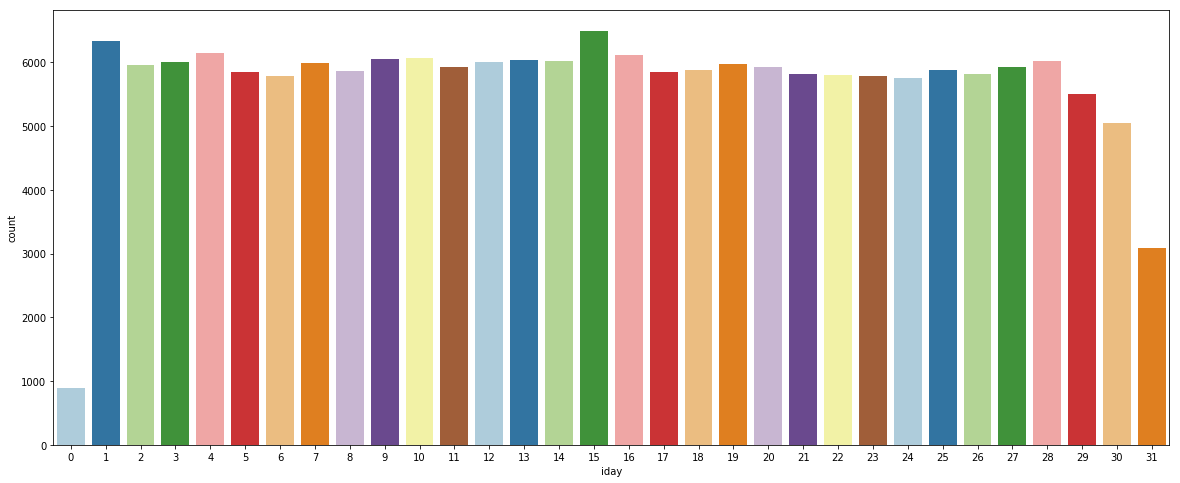

In [64]:
plt.figure(figsize=(20,8))
sns.countplot(x='iday',data=df,palette='Paired')

In [65]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [66]:
countryKillFormatData = countryKillData.pivot_table(columns='country', values='nkill', aggfunc='sum')
countryKillFormatData

country,4,5,6,7,8,10,11,12,14,15,...,428,499,532,603,604,605,1001,1002,1003,1004
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,81.0,2.0,0.0,3410.0,324.0,15.0,3.0,1.0,83.0,2634.0


In [67]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

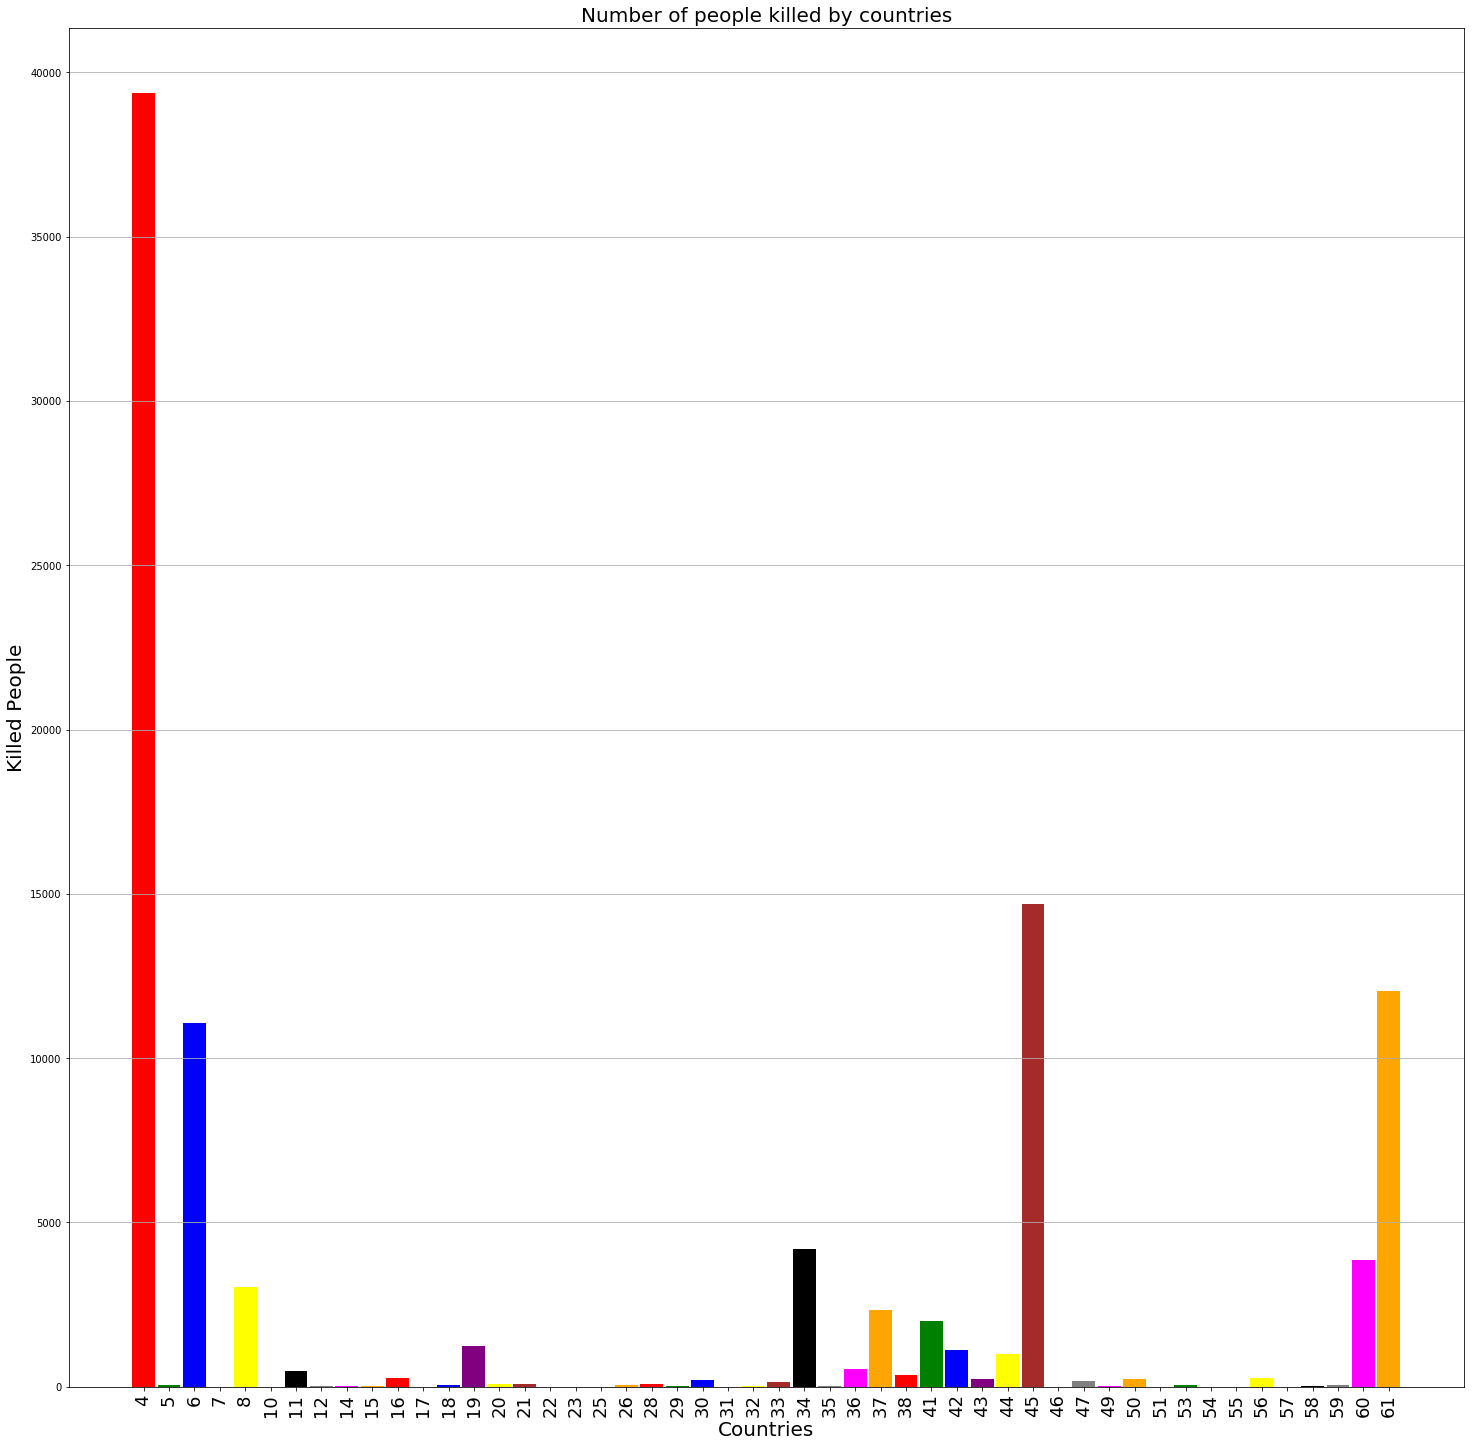

In [68]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

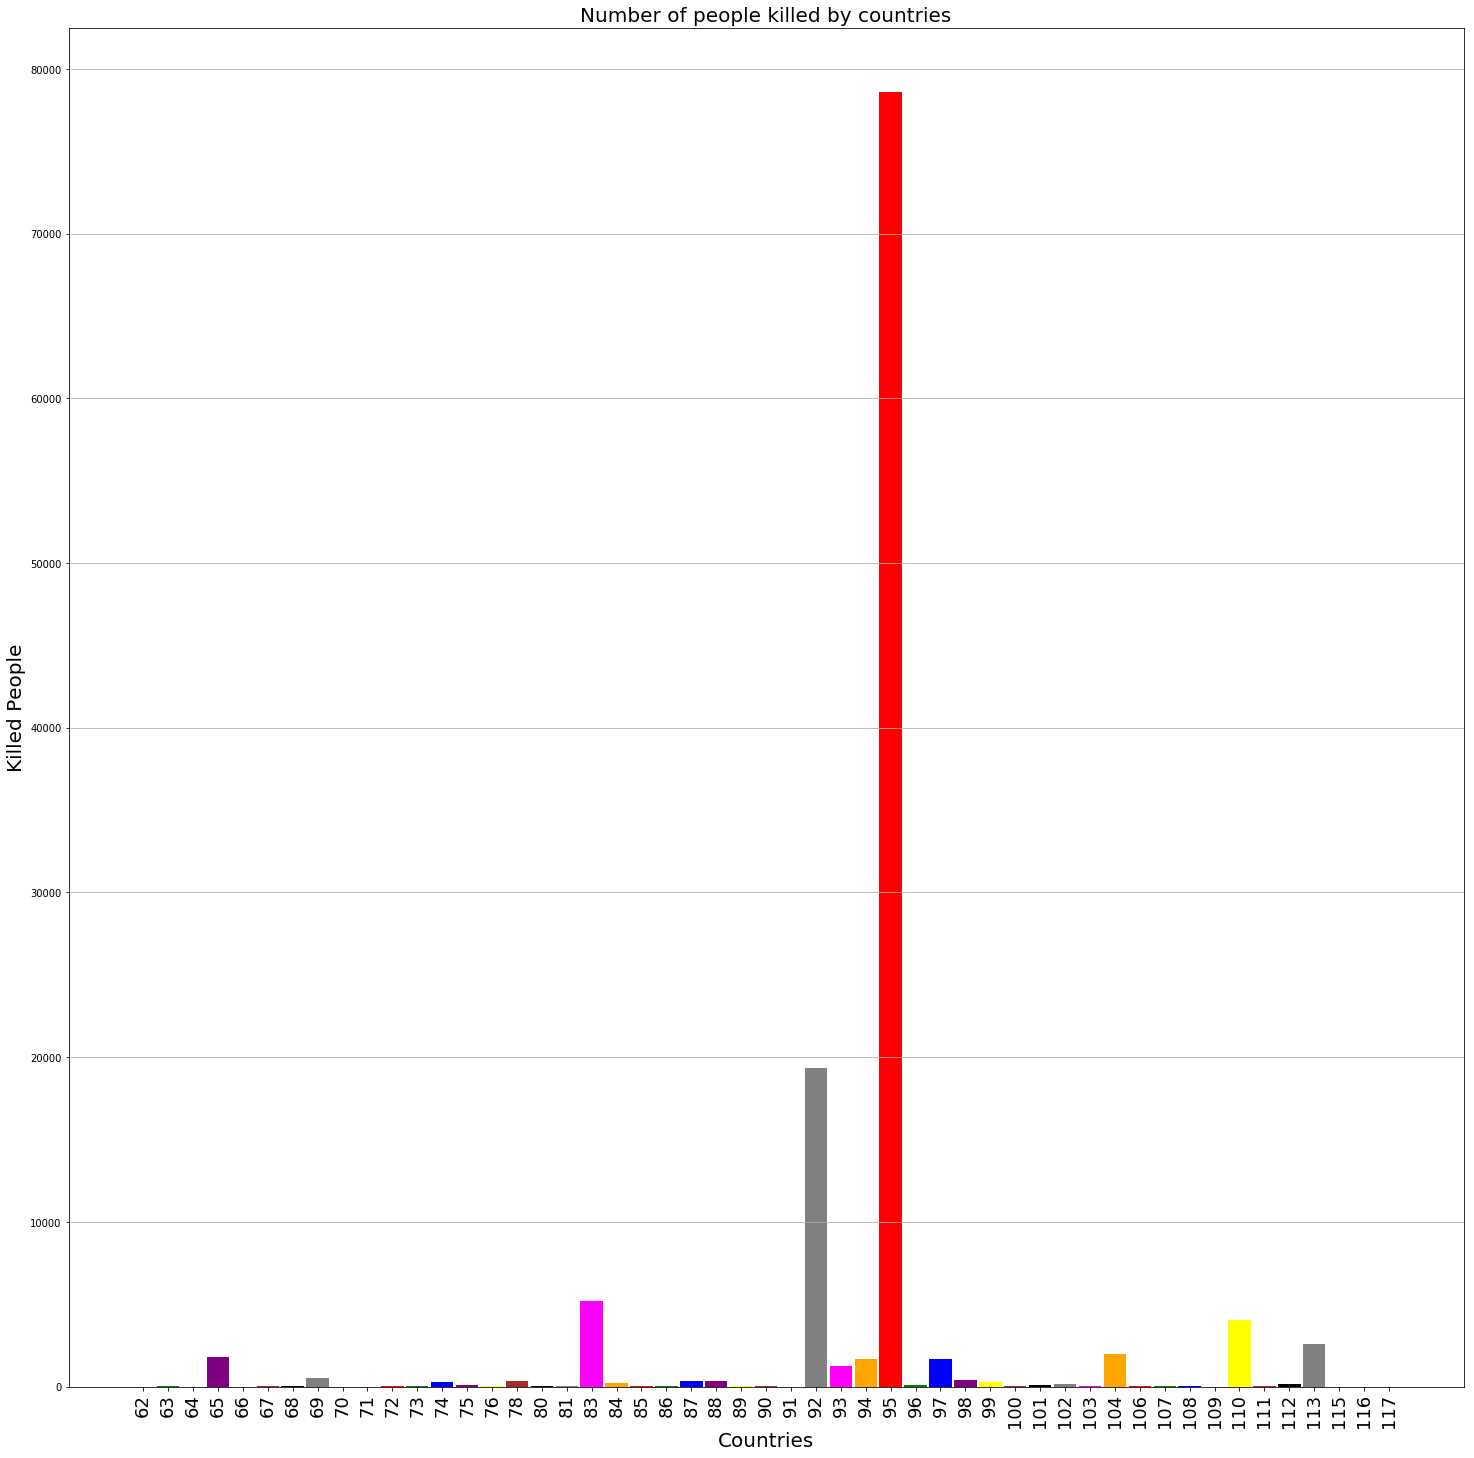

In [69]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

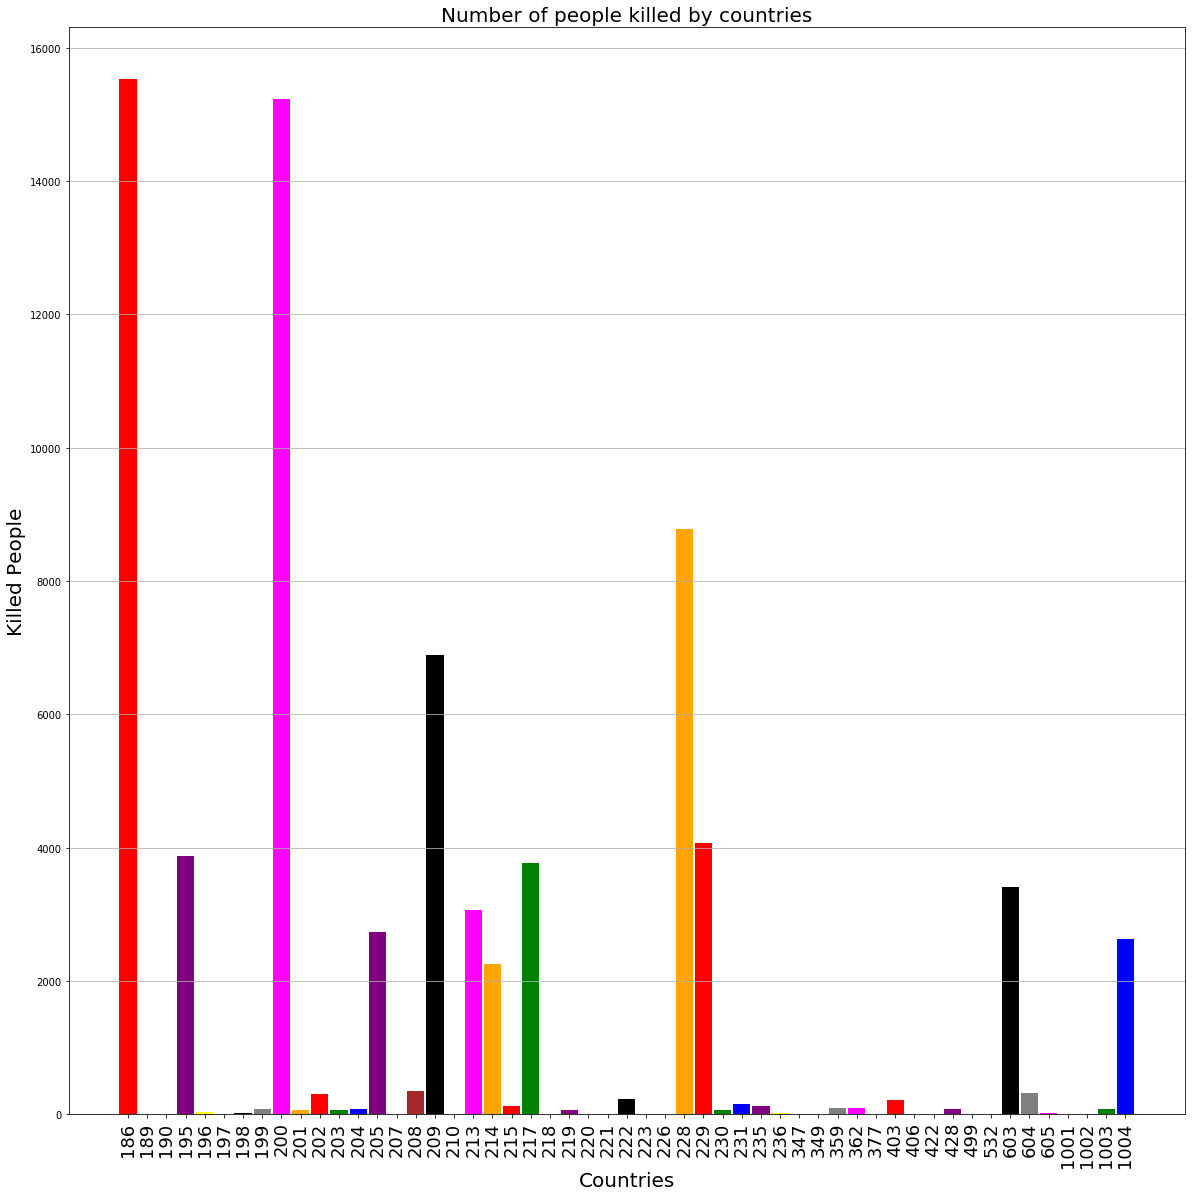

In [70]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()